In [1]:
#Import necessary packages for analysis and viz
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import requests
import io

# import folium
# from folium.plugins import HeatMap
# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)

import os


In [2]:
#read CSV file from GitHub url
url_vehicle_data = 'https://media.githubusercontent.com/media/kmantha95/Predicting-Used-Car-Prices-CapstoneProject/main/raw%20data/vehicles.csv'
vehicle_data = pd.read_csv(url_vehicle_data)

In [3]:
#info method on vehicle_data to see a summary of the data
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423857 entries, 0 to 423856
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            423857 non-null  int64  
 1   url           423857 non-null  object 
 2   region        423857 non-null  object 
 3   region_url    423857 non-null  object 
 4   price         423857 non-null  int64  
 5   year          328743 non-null  float64
 6   manufacturer  313242 non-null  object 
 7   model         325384 non-null  object 
 8   condition     176719 non-null  object 
 9   cylinders     197679 non-null  object 
 10  fuel          327214 non-null  object 
 11  odometer      270585 non-null  float64
 12  title_status  327759 non-null  object 
 13  transmission  328065 non-null  object 
 14  vin           184420 non-null  object 
 15  drive         231119 non-null  object 
 16  size          102627 non-null  object 
 17  type          241157 non-null  object 
 18  pain

In [4]:
#head method on ski_data to print the first several rows of the data
vehicle_data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,...,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,...,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [5]:
#Count NaN's using .sum() and .isnull() in each column of vehicle_data.
#Count the percent of missing values in each column by using .mean() * 100
#Use pd.concat() to present sums and %s in single DataFrame
#Assign column names using .columns ('total_count' and '%')
#Order data using .sort_values()

missing_data = pd.concat([vehicle_data.isnull().sum(), 100 * vehicle_data.isnull().mean()], axis=1)
missing_data.columns=['total_count_missing', '%_missing']
missing_data.sort_values(by=['total_count_missing', '%_missing'])

,total_count_missing,%_missing
id,0,0.000000
url,0,0.000000
region,0,0.000000
region_url,0,0.000000
price,0,0.000000
state,0,0.000000
image_url,94196,22.223533
description,94203,22.225184
year,95114,22.440115
transmission,95792,22.600075


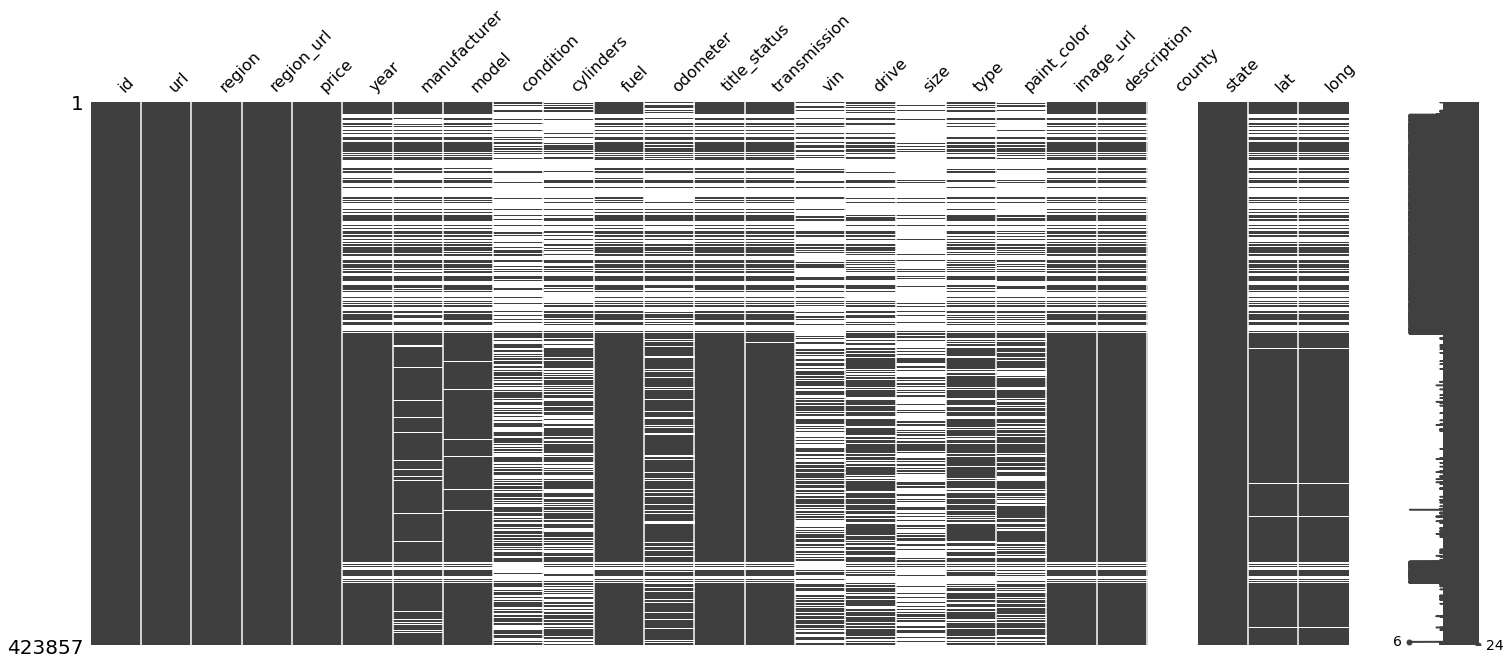

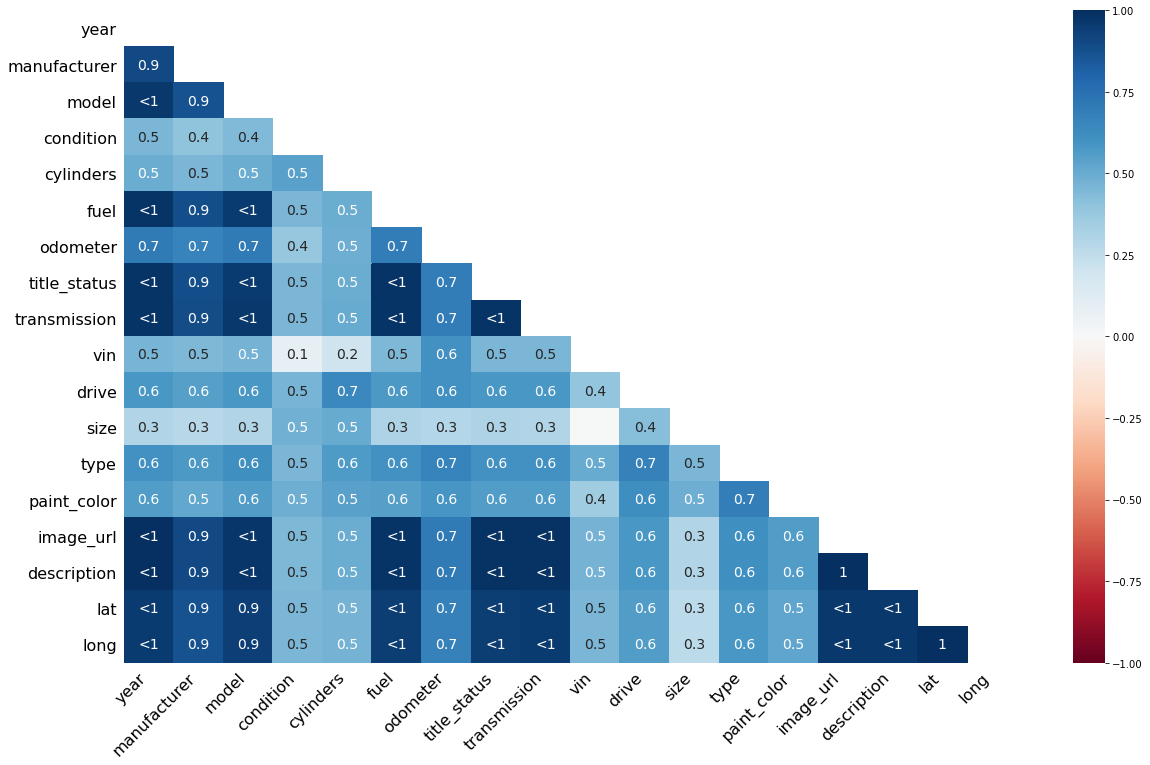

In [6]:
import missingno as msno

msno.matrix(vehicle_data)
msno.heatmap(vehicle_data)
plt.show()

It appears that `image_url`, `description`, `year`, `transmission`, `title_status`, `fuel`, `model`, `lat`, `long`, and `manufacturer` are all missing ~20-25% of their values. `county` is missing all values, and `size` is missing ~75%. It is notable that `condition` is missing ~60% of its values.

In order to predict used car values, there are certain features that do not have any bearing on the price. The `url` and `image_url` can be dropped as these features likely have no impact on the pricing of used cars, since there are numerous other identifying features. `county` can be dropped as well since it is missing all values, and we have other metrics for location already.

Although `vin` is missing over 50% of values, the vin number itself contains characters that can identify other features of the car such as year and model. Thus, since ~22% of models and years are missing, there may be values that the vin can help fill in.

Even though `size` is missing a high quantity of values, it should still be included for now as it might be a notable feature.

In [7]:
vehicle_data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [8]:
vehicle_data_drops = vehicle_data.drop(columns=['url','image_url', 'county'])

In [9]:
vehicle_data_drops.head()

,id,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,transmission,vin,drive,size,type,paint_color,description,state,lat,long
0,7184791621,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,...,automatic,1GTEK19T3YE366021,4wd,NaN,NaN,red,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,mn,46.8433,-92.2550
1,7184773187,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,...,automatic,NaN,fwd,NaN,NaN,grey,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,mn,46.9074,-92.4638
2,7193375964,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,...,automatic,NaN,fwd,NaN,NaN,blue,2013 Prius V Model Two. One owner—must sell my...,ct,41.1770,-73.1336
3,7195108810,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,...,manual,NaN,4wd,mid-size,sedan,grey,"2003 Mitsubishi Lancer Evolution, silver. Abo...",nm,35.1868,-106.6650
4,7184712241,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,...,automatic,1GTHK23D57F102022,4wd,full-size,truck,white,"**Bad Credit, No Credit... No Problem!**2007 G...",mn,45.6836,-92.9648


In [10]:
vehicle_data_drops['vin'].describe()

count                184420
unique               103588
top       1HTMRAAM19J040080
freq                    133
Name: vin, dtype: object

In [11]:
vehicle_data_drops['year'].describe()

count    328743.000000
mean       2009.827358
std          10.135809
min        1900.000000
25%        2007.000000
50%        2012.000000
75%        2016.000000
max        2021.000000
Name: year, dtype: float64

In [12]:
vehicle_data_drops['vin'].describe()

count                184420
unique               103588
top       1HTMRAAM19J040080
freq                    133
Name: vin, dtype: object

In [13]:
#create key value dictionary of  10th digit character of VIN and its corresponding year starting from 1990 until 2020
vin_kv_dict = {'L':1990, 'M':1991, 'N':1992, 'P':1993, 'R':1994, 'S':1995, 'T':1996, 'V':1997, 'W':1998, 'X':1999, 'Y':2000,
               '1':2001, '2':2002, '3':2003, '4':2004, '5':2005, '6':2006, '7':2007, '8':2008, '9':2009, 'A':2010, 'B':2011,
               'C':2012, 'D':2013, 'E':2014, 'F':2015, 'G':2016, 'H':2017, 'I':2018, 'J':2019, 'K':2020}

In [14]:
#create an isolated list from the 'vin' column
vinlist = vehicle_data_drops['vin'].to_list()
print(len(vinlist))

423857


In [15]:
from collections import Counter
 
print("Total Unique Items:", len(Counter(vinlist).keys())) 

Total Unique Items: 103589


In [16]:
#create new list which features the 10th digit of every valid VIN (no NaN, 17 characters), otherwise replace with "***"

vin_digit10 = [i[9] if pd.notna(i) and len(i) == 17 else '***' for i in vinlist]

print(vin_digit10[2050:2070])

['K', 'L', 'G', 'H', 'G', 'G', 'C', 'H', 'H', 'E', 'K', '***', 'J', 'J', 'B', 'G', 'K', 'K', 'H', '6']


In [17]:
#match the key from vin_kv_dict to the character in vin_digit10, and replace with the value from the dictionary (the year)
#save decoded value in new list which will get appended to dataframe
vin_decoded_digit10 = [vin_kv_dict.get(key, '***') for key in vin_digit10]
vin_decoded_digit10[20000:20010]

['***', 2008, '***', 2013, '***', '***', '***', '***', '***', '***']

In [18]:
vehicle_data_drops['year_nonan'] = vehicle_data_drops['year']
vehicle_data_drops['year_nonan'] = vehicle_data_drops['year_nonan'].fillna('***')
vehicle_data_drops['year_nonan'][49]

2005.0

In [19]:
#insert the vin_year list as a column in the dataframe
vehicle_data_drops['vin_year'] = vin_decoded_digit10

In [20]:
vehicle_data_drops.head()

,id,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,drive,size,type,paint_color,description,state,lat,long,year_nonan,vin_year
0,7184791621,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,...,4wd,NaN,NaN,red,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,mn,46.8433,-92.2550,2000,2000
1,7184773187,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,...,fwd,NaN,NaN,grey,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,mn,46.9074,-92.4638,2013,***
2,7193375964,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,...,fwd,NaN,NaN,blue,2013 Prius V Model Two. One owner—must sell my...,ct,41.1770,-73.1336,2013,***
3,7195108810,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,...,4wd,mid-size,sedan,grey,"2003 Mitsubishi Lancer Evolution, silver. Abo...",nm,35.1868,-106.6650,2003,***
4,7184712241,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,...,4wd,full-size,truck,white,"**Bad Credit, No Credit... No Problem!**2007 G...",mn,45.6836,-92.9648,2007,2007


In [21]:
vehicle_data_drops.loc[vehicle_data_drops['year_nonan'].isin(['***']) & (~vehicle_data_drops['vin_year'].isin(['***']))]

,id,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,drive,size,type,paint_color,description,state,lat,long,year_nonan,vin_year
2431,7194993460,"washington, DC",https://washingtondc.craigslist.org,34899,NaN,NaN,des-Benz GLA,NaN,4 cylinders,NaN,...,NaN,NaN,SUV,grey,2020 *Mercedes-Benz* *GLA* GLA 250 4MATIC SUV ...,dc,39.1724,-77.1646,***,1990
4565,7194381506,"washington, DC",https://washingtondc.craigslist.org,26995,NaN,NaN,des-Benz GLA,NaN,4 cylinders,NaN,...,NaN,NaN,SUV,red,2019 *Mercedes-Benz* *GLA* GLA 250 4MATIC SUV ...,dc,39.1724,-77.1646,***,2020
4908,7193758457,"washington, DC",https://washingtondc.craigslist.org,49900,NaN,rover,velar,NaN,4 cylinders,gas,...,4wd,NaN,SUV,black,2020 *Land Rover* *Range Rover Velar* P250 S S...,dc,39.1724,-77.1646,***,1990
4910,7193758272,"washington, DC",https://washingtondc.craigslist.org,68500,NaN,rover,sport,NaN,6 cylinders,NaN,...,4wd,NaN,SUV,black,2020 *Land Rover* *Range Rover Sport* PHEV HSE...,dc,39.1724,-77.1646,***,1990
5563,7194894376,santa fe / taos,https://santafe.craigslist.org,47900,NaN,NaN,Grand Caravan,NaN,6 cylinders,NaN,...,fwd,NaN,van,silver,"2019 *Dodge* *Grand Caravan* SE Wagon - $47,90...",nm,39.6744,-104.9990,***,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417143,7194296969,western slope,https://westslope.craigslist.org,51900,NaN,NaN,a Sienna,NaN,6 cylinders,gas,...,fwd,NaN,van,grey,2019 *Toyota* *Sienna* LE Automatic Access Sea...,co,39.6744,-104.9990,***,2020
417144,7194282699,western slope,https://westslope.craigslist.org,56900,NaN,NaN,a Sienna,NaN,6 cylinders,gas,...,fwd,NaN,van,black,2020 *Toyota* *Sienna* XLE Automatic Access Se...,co,39.6744,-104.9990,***,1990
417744,7193659482,western slope,https://westslope.craigslist.org,51900,NaN,NaN,a Sienna,NaN,6 cylinders,gas,...,fwd,NaN,van,red,2019 *Toyota* *Sienna* LE Automatic Access Sea...,co,39.6744,-104.9990,***,2020
418703,7184674796,norfolk / hampton roads,https://norfolk.craigslist.org,14900,NaN,NaN,n Altima,NaN,4 cylinders,gas,...,fwd,NaN,sedan,grey,"2018 *Nissan* *Altima* 2.5 SL Sedan - $14,900C...",va,37.5236,-77.3209,***,2019


In [22]:
vehicle_data_drops['year_all'] = np.where(
    vehicle_data_drops['year_nonan'] == '***', vehicle_data_drops['vin_year'], vehicle_data_drops['year_nonan'])

vehicle_data_drops.head()

,id,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,size,type,paint_color,description,state,lat,long,year_nonan,vin_year,year_all
0,7184791621,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,...,NaN,NaN,red,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,mn,46.8433,-92.2550,2000,2000,2000
1,7184773187,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,...,NaN,NaN,grey,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,mn,46.9074,-92.4638,2013,***,2013
2,7193375964,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,...,NaN,NaN,blue,2013 Prius V Model Two. One owner—must sell my...,ct,41.1770,-73.1336,2013,***,2013
3,7195108810,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,...,mid-size,sedan,grey,"2003 Mitsubishi Lancer Evolution, silver. Abo...",nm,35.1868,-106.6650,2003,***,2003
4,7184712241,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,...,full-size,truck,white,"**Bad Credit, No Credit... No Problem!**2007 G...",mn,45.6836,-92.9648,2007,2007,2007


In [23]:
missing_data = pd.concat([vehicle_data_drops.isnull().sum(), 100 * vehicle_data_drops.isnull().mean()], axis=1)
missing_data.columns=['total_count_missing', '%_missing']
missing_data.sort_values(by=['total_count_missing', '%_missing'])

,total_count_missing,%_missing
id,0,0.000000
region,0,0.000000
region_url,0,0.000000
price,0,0.000000
state,0,0.000000
year_nonan,0,0.000000
vin_year,0,0.000000
year_all,0,0.000000
description,94203,22.225184
year,95114,22.440115


In [24]:
print("Total missing values as '***' are:", np.sum(vehicle_data_drops['year_all'] == '***'))
print('Total filled values as years are:', np.sum(vehicle_data_drops['year_all'] != '***'))
print('Total percent of year values missing are:', (np.sum(vehicle_data_drops['year_all'] == '***'))/(np.sum(vehicle_data_drops['year_all'] != '***')))

Total missing values as '***' are: 94200
Total filled values as years are: 329657
Total percent of year values missing are: 0.28575155388782886


In [25]:
vehicle_data_drops['manufacturer'].unique()

array(['gmc', 'hyundai', 'toyota', 'mitsubishi', 'ford', 'chevrolet',
       'ram', nan, 'buick', 'jeep', 'dodge', 'subaru', 'nissan', 'audi',
       'rover', 'lexus', 'honda', 'chrysler', 'mini', 'pontiac',
       'mercedes-benz', 'cadillac', 'bmw', 'kia', 'volvo', 'volkswagen',
       'jaguar', 'acura', 'saturn', 'mazda', 'mercury', 'lincoln',
       'infiniti', 'ferrari', 'fiat', 'tesla', 'land rover',
       'harley-davidson', 'datsun', 'alfa-romeo', 'morgan',
       'aston-martin', 'porche', 'hennessey'], dtype=object)

In [26]:
vehicle_data_drops['manufacturer'].value_counts()

ford               59786
chevrolet          46603
toyota             26001
honda              18898
nissan             17536
jeep               14224
gmc                12782
dodge              12547
ram                11917
hyundai             8765
subaru              7971
bmw                 7717
volkswagen          7121
kia                 7069
mercedes-benz       6859
chrysler            5903
buick               4668
cadillac            4615
mazda               3964
lexus               3916
audi                3334
acura               2784
lincoln             2593
pontiac             2323
infiniti            2318
volvo               2097
mitsubishi          1945
mercury             1330
mini                1320
rover               1151
saturn              1083
jaguar               787
fiat                 567
tesla                299
alfa-romeo           138
harley-davidson      125
datsun                69
ferrari               64
aston-martin          28
land rover            15


In [31]:
vehicle_data_drops['year_all'].dtype

dtype('O')

In [32]:
vehicle_data_drops['year_all'] = vehicle_data_drops['year_all'].replace('***', np.nan)
vehicle_data_drops['year_all'].dtype

dtype('float64')

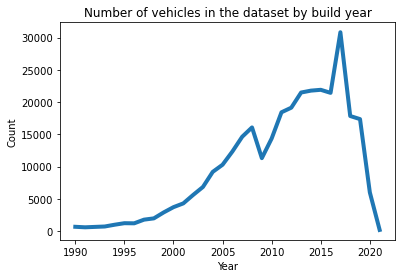

In [34]:
#How many relevant "years" are there for the data? We likely do not need to evaluate cars older than 1980
vehicle_data_drops[(vehicle_data_drops.year_all != np.nan) & (vehicle_data_drops.year_all >= 1990)].year_all.value_counts().sort_index().plot(lw = 4)
plt.title("Number of vehicles in the dataset by build year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

We have now got the most complete Year information for all cars based on the VIN, and it seems at this point that we have extracted maximum value from that key feature.

It is clear that not only are most of the years above 1990 for the cars, but also the cars older than 1990 should not even be considered as essential for resale. They certainly would not be dominating market interest as they are more than 30 years old, so we can drop those cars from the dataframe.

In [41]:
#drop all years below 1990, save to new DataFrame called vehicle_data_drops_filtered
vehicle_data_drops_filtered = vehicle_data_drops[(vehicle_data_drops['year_all'] >= 1990) & (vehicle_data_drops['year_all'] <= 2020)]
vehicle_data_drops_filtered.shape

(317291, 25)

In [42]:
vehicle_data_drops_filtered['year_all'].value_counts()

2017.0    30828
2015.0    21901
2014.0    21773
2013.0    21480
2016.0    21430
2012.0    19130
2011.0    18415
2018.0    17839
2019.0    17357
2008.0    16070
2007.0    14624
2010.0    14350
2006.0    12331
2009.0    11303
2005.0    10284
2004.0     9176
2003.0     6835
2020.0     5991
2002.0     5595
2001.0     4287
2000.0     3703
1999.0     2885
1998.0     1964
1997.0     1765
1995.0     1216
1996.0     1198
1994.0      977
1993.0      704
1990.0      658
1992.0      642
1991.0      580
Name: year_all, dtype: int64

In [43]:
#what type of condition are we seeing on most listed vehicles?
vehicle_data_drops_filtered['condition'].value_counts()

excellent    82158
good         61809
like new     17380
fair          5680
new           1014
salvage        443
Name: condition, dtype: int64

In [45]:
#drop the salvage cars, and merge 'new' and 'like-new' into the 'like-new' column
vehicle_data_drops_filtered = vehicle_data_drops_filtered[vehicle_data_drops_filtered.condition != 'salvage']
vehicle_data_drops_filtered['condition'] = vehicle_data_drops_filtered['condition'].replace('new', 'like new')
vehicle_data_drops_filtered['condition'].value_counts()

<ipython-input-45-c325f765c273>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_data_drops_filtered['condition'] = vehicle_data_drops_filtered['condition'].replace('new', 'like new')


excellent    82158
good         61809
like new     18394
fair          5680
Name: condition, dtype: int64

In [46]:
#what is the status of the vehicles we're seeing?
vehicle_data_drops['title_status'].value_counts()

clean         315607
rebuilt         6017
salvage         3248
lien            1963
missing          711
parts only       213
Name: title_status, dtype: int64

In [47]:
#most people will not care for salvaged cars, parts only, or vehicles with missing titles, so those values can be dropped
vehicle_data_drops_filtered = vehicle_data_drops_filtered[(vehicle_data_drops_filtered.title_status != 'parts only') & (vehicle_data_drops_filtered.title_status != 'missing') & (vehicle_data_drops_filtered.title_status != 'salvage')]
vehicle_data_drops_filtered['title_status'].value_counts()

clean      303741
rebuilt      5927
lien         1932
Name: title_status, dtype: int64

In [48]:
vehicle_data_drops['fuel'].value_counts()

gas         286775
diesel       24414
other        11311
hybrid        3737
electric       977
Name: fuel, dtype: int64

In [49]:
missing_data = pd.concat([vehicle_data_drops_filtered.isnull().sum(), 100 * vehicle_data_drops_filtered.isnull().mean()], axis=1)
missing_data.columns=['total_count_missing', '%_missing']
missing_data.sort_values(by=['total_count_missing', '%_missing'])

,total_count_missing,%_missing
id,0,0.000000
region,0,0.000000
region_url,0,0.000000
price,0,0.000000
state,0,0.000000
year_nonan,0,0.000000
vin_year,0,0.000000
year_all,0,0.000000
description,6,0.001914
year,914,0.291551


In [51]:
vehicle_data_drops_filtered['transmission'].value_counts()

automatic    282183
manual        18508
other         11242
Name: transmission, dtype: int64

In [52]:
vehicle_data_drops_filtered['type'].value_counts()

sedan          63080
SUV            61221
truck          25743
pickup         23234
other          12311
coupe          10938
hatchback       9309
wagon           8164
van             7156
mini-van        5140
convertible     4724
offroad          379
bus              340
Name: type, dtype: int64

In [56]:
vehicle_data_drops_filtered['drive'].value_counts()

4wd    97168
fwd    88036
rwd    35849
Name: drive, dtype: int64

In [57]:
vehicle_data_drops_filtered['drive'] = vehicle_data_drops_filtered['drive'].replace('4wd', 'fwd')
vehicle_data_drops_filtered['drive'].value_counts()

<ipython-input-57-7722bff40a85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_data_drops_filtered['drive'] = vehicle_data_drops_filtered['drive'].replace('4wd', 'fwd')


fwd    185204
rwd     35849
Name: drive, dtype: int64

In [55]:
vehicle_data_drops_filtered['size'].value_counts()

full-size      49102
mid-size       29198
compact        15331
sub-compact     2496
Name: size, dtype: int64

In [59]:
vehicle_data_drops_filtered['paint_color'].value_counts()

white     56105
black     42317
silver    32026
blue      21366
grey      21058
red       20592
custom     5757
green      5282
brown      4195
yellow     1402
orange     1266
purple      603
Name: paint_color, dtype: int64

Since `year`, `year_nonan`, and `vin_year` are no longer needed (have been parsed from `vin`), we can drop those columns and change `year_all` to `year`. Moreover, the `description` column can be dropped because we should not need any information present there. We can also drop the `size` column because 70% of the values are missing, and vehicle type is a stronger feature regardless.

We can fill in the missing `title_status` values with "clean", and the missing `fuel` fields with "other".

In [60]:
vehicle_data_drops_filtered = vehicle_data_drops_filtered.drop(columns=['year','vin_year', 'year_nonan', 'description', 'size'])
vehicle_data_drops_filtered.head()

,id,region,region_url,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,type,paint_color,state,lat,long,year_all
0,7184791621,duluth / superior,https://duluth.craigslist.org,6995,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,1GTEK19T3YE366021,fwd,NaN,red,mn,46.8433,-92.2550,2000.0
1,7184773187,duluth / superior,https://duluth.craigslist.org,8750,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,NaN,fwd,NaN,grey,mn,46.9074,-92.4638,2013.0
2,7193375964,new haven,https://newhaven.craigslist.org,10900,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,NaN,fwd,NaN,blue,ct,41.1770,-73.1336,2013.0
3,7195108810,albuquerque,https://albuquerque.craigslist.org,12500,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,NaN,fwd,sedan,grey,nm,35.1868,-106.6650,2003.0
4,7184712241,duluth / superior,https://duluth.craigslist.org,16995,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,1GTHK23D57F102022,fwd,truck,white,mn,45.6836,-92.9648,2007.0


In [62]:
vehicle_data_drops_filtered['title_status'] = vehicle_data_drops_filtered['title_status'].replace(np.nan, 'clean')
vehicle_data_drops_filtered['fuel'] = vehicle_data_drops_filtered['fuel'].replace(np.nan, 'other')

In [63]:
missing_data = pd.concat([vehicle_data_drops_filtered.isnull().sum(), 100 * vehicle_data_drops_filtered.isnull().mean()], axis=1)
missing_data.columns=['total_count_missing', '%_missing']
missing_data.sort_values(by=['total_count_missing', '%_missing'])

,total_count_missing,%_missing
id,0,0.000000
region,0,0.000000
region_url,0,0.000000
price,0,0.000000
fuel,0,0.000000
title_status,0,0.000000
state,0,0.000000
year_all,0,0.000000
transmission,1563,0.498571
model,3259,1.039567


In [64]:
vehicle_data_drops_filtered['year_all'].value_counts()

2017.0    30592
2015.0    21668
2014.0    21572
2013.0    21297
2016.0    21210
2012.0    18935
2011.0    18252
2018.0    17652
2019.0    17218
2008.0    15898
2007.0    14455
2010.0    14211
2006.0    12147
2009.0    11174
2005.0    10112
2004.0     9007
2003.0     6709
2020.0     5937
2002.0     5484
2001.0     4193
2000.0     3605
1999.0     2805
1998.0     1900
1997.0     1710
1995.0     1176
1996.0     1159
1994.0      940
1993.0      679
1990.0      634
1992.0      610
1991.0      555
Name: year_all, dtype: int64

In [65]:
vehicle_data_drops_filtered.rename(columns={"year_all":"year"}, inplace = True)
vehicle_data_drops_filtered.head()

,id,region,region_url,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,type,paint_color,state,lat,long,year
0,7184791621,duluth / superior,https://duluth.craigslist.org,6995,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,1GTEK19T3YE366021,fwd,NaN,red,mn,46.8433,-92.2550,2000.0
1,7184773187,duluth / superior,https://duluth.craigslist.org,8750,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,NaN,fwd,NaN,grey,mn,46.9074,-92.4638,2013.0
2,7193375964,new haven,https://newhaven.craigslist.org,10900,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,NaN,fwd,NaN,blue,ct,41.1770,-73.1336,2013.0
3,7195108810,albuquerque,https://albuquerque.craigslist.org,12500,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,NaN,fwd,sedan,grey,nm,35.1868,-106.6650,2003.0
4,7184712241,duluth / superior,https://duluth.craigslist.org,16995,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,1GTHK23D57F102022,fwd,truck,white,mn,45.6836,-92.9648,2007.0


In [72]:
len(vehicle_data_drops_filtered.state.unique())

51

In [84]:
vehicle_data_drops_filtered['price'].value_counts()

0        27480
7995      2887
8995      2869
6995      2785
9995      2689
         ...  
20070        1
15976        1
32608        1
16232        1
7004         1
Name: price, Length: 14298, dtype: int64

In [95]:
vehicle_data_drops_filtered = vehicle_data_drops_filtered[(vehicle_data_drops_filtered["price"] >= 100) & (vehicle_data_drops_filtered["price"] <= 500000)]
vehicle_data_drops_filtered.shape

(284298, 20)

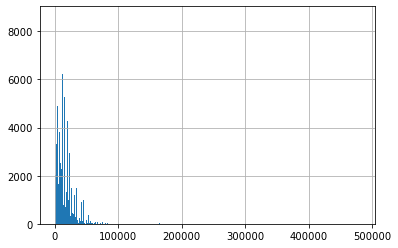

In [102]:
vehicle_data_drops_filtered['price'].hist(bins=2000)

In [103]:
vehicle_data_drops_filtered = vehicle_data_drops_filtered[vehicle_data_drops_filtered["price"] <= 100000]
vehicle_data_drops_filtered.shape

(283848, 20)

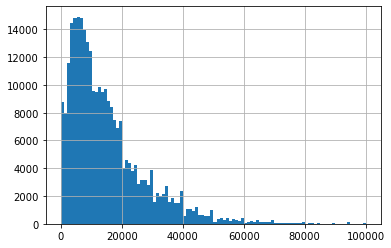

In [110]:
vehicle_data_drops_filtered['price'].hist(bins=100)

It is clear that there is a large clustering of cars priced under 20k, and we see a sharp dropoff of cars at pricepoints above 20k, with a significantly diminished quantity above 40k. We are working with a dataset that is currently looking only at cars from 1990 to 2020, as well as cars within the $100 to $100k price range.

Now we must examine the cars based on odometer reading. Firstly, we must check to see any extraneous values and remove them. There are no missing values in key numerical categories such as year, however there are in odometer, so we may need to impute the NaN's with some other value.

In [111]:
vehicle_data_drops_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283848 entries, 0 to 423856
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            283848 non-null  int64  
 1   region        283848 non-null  object 
 2   region_url    283848 non-null  object 
 3   price         283848 non-null  int64  
 4   manufacturer  271825 non-null  object 
 5   model         280979 non-null  object 
 6   condition     155335 non-null  object 
 7   cylinders     172662 non-null  object 
 8   fuel          283848 non-null  object 
 9   odometer      239580 non-null  float64
 10  title_status  283848 non-null  object 
 11  transmission  282660 non-null  object 
 12  vin           162116 non-null  object 
 13  drive         201176 non-null  object 
 14  type          208928 non-null  object 
 15  paint_color   194286 non-null  object 
 16  state         283848 non-null  object 
 17  lat           281987 non-null  float64
 18  long

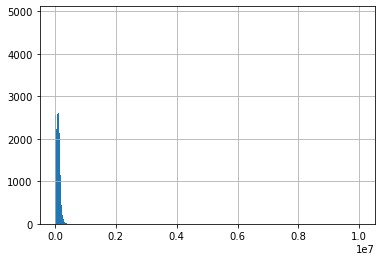

In [114]:
vehicle_data_drops_filtered['odometer'].hist(bins=5000)

In [115]:
#since there is a wide spread for the odometer, we can reasonably drop cars above 600k miles and below 100 miles
vehicle_data_drops_filtered = vehicle_data_drops_filtered[(vehicle_data_drops_filtered["odometer"] >= 100) & (vehicle_data_drops_filtered["odometer"] <= 600000)]
vehicle_data_drops_filtered.shape

(236994, 20)

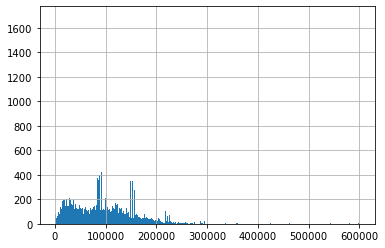

In [118]:
vehicle_data_drops_filtered['odometer'].hist(bins=5000)

In [121]:
missing_data = pd.concat([vehicle_data_drops_filtered.isnull().sum(), 100 * vehicle_data_drops_filtered.isnull().mean()], axis=1)
missing_data.columns=['total_count_missing', '%_missing']
missing_data.sort_values(by=['total_count_missing', '%_missing'])

,total_count_missing,%_missing
id,0,0.000000
region,0,0.000000
region_url,0,0.000000
price,0,0.000000
fuel,0,0.000000
odometer,0,0.000000
title_status,0,0.000000
state,0,0.000000
year,0,0.000000
transmission,1036,0.437142


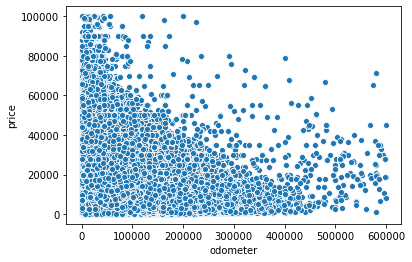

In [123]:
ax = sns.scatterplot(x="odometer", y="price", data=vehicle_data_drops_filtered)
# ax.get_xaxis().get_major_formatter().set_scientific(False)
# ax.get_yaxis().get_major_formatter().set_scientific(False)

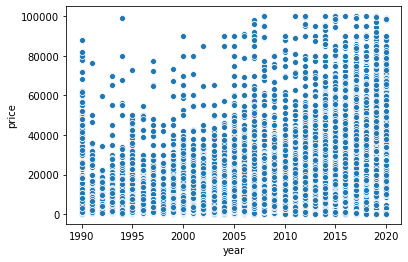

In [125]:
bx = sns.scatterplot(x="year", y="price", data= vehicle_data_drops_filtered)

In [126]:
#assign variables to the mean odometer value of each vehicle condition
excellent_odo_mean = vehicle_data_drops_filtered[vehicle_data_drops_filtered['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = vehicle_data_drops_filtered[vehicle_data_drops_filtered['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = vehicle_data_drops_filtered[vehicle_data_drops_filtered['condition'] == 'like new']['odometer'].mean()
fair_odo_mean = vehicle_data_drops_filtered[vehicle_data_drops_filtered['condition'] == 'fair']['odometer'].mean()

In [131]:
print('Like new average odometer:', round( like_new_odo_mean,2))
print('Excellent average odometer:', round( excellent_odo_mean,2))
print('Good average odometer:', round( good_odo_mean,2))
print('Fair average odometer:', round( fair_odo_mean,2))

Like new average odometer: 74930.13
Excellent average odometer: 106877.83
Good average odometer: 109555.33
Fair average odometer: 180054.71


In [136]:
#fill in the missing conditions using the odometer ranges derived from the means of the respective conditions
vehicle_data_drops_filtered.loc[vehicle_data_drops_filtered['odometer'] <= like_new_odo_mean, 'condition'] = vehicle_data_drops_filtered.loc[vehicle_data_drops_filtered['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

vehicle_data_drops_filtered.loc[vehicle_data_drops_filtered['odometer'] >= fair_odo_mean, 'condition'] = vehicle_data_drops_filtered.loc[vehicle_data_drops_filtered['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

vehicle_data_drops_filtered.loc[((vehicle_data_drops_filtered['odometer'] > like_new_odo_mean) & 
       (vehicle_data_drops_filtered['odometer'] <= excellent_odo_mean)), 'condition'] = vehicle_data_drops_filtered.loc[((vehicle_data_drops_filtered['odometer'] > like_new_odo_mean) & 
       (vehicle_data_drops_filtered['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

vehicle_data_drops_filtered.loc[((vehicle_data_drops_filtered['odometer'] > excellent_odo_mean) & 
       (vehicle_data_drops_filtered['odometer'] <= good_odo_mean)), 'condition'] = vehicle_data_drops_filtered.loc[((vehicle_data_drops_filtered['odometer'] > excellent_odo_mean) & 
       (vehicle_data_drops_filtered['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

vehicle_data_drops_filtered.loc[((vehicle_data_drops_filtered['odometer'] > good_odo_mean) & 
       (vehicle_data_drops_filtered['odometer'] <= fair_odo_mean)), 'condition'] = vehicle_data_drops_filtered.loc[((vehicle_data_drops_filtered['odometer'] > good_odo_mean) & 
       (vehicle_data_drops_filtered['odometer'] <= fair_odo_mean)), 'condition'].fillna('fair')

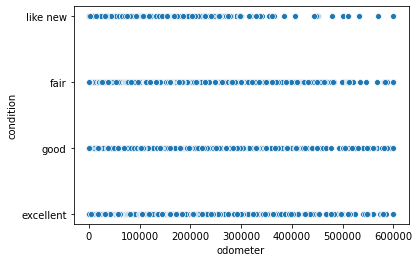

In [137]:
ax = sns.scatterplot(x="odometer", y="condition", data=vehicle_data_drops_filtered)

In [138]:
missing_data = pd.concat([vehicle_data_drops_filtered.isnull().sum(), 100 * vehicle_data_drops_filtered.isnull().mean()], axis=1)
missing_data.columns=['total_count_missing', '%_missing']
missing_data.sort_values(by=['total_count_missing', '%_missing'])

,total_count_missing,%_missing
id,0,0.000000
region,0,0.000000
region_url,0,0.000000
price,0,0.000000
condition,0,0.000000
fuel,0,0.000000
odometer,0,0.000000
title_status,0,0.000000
state,0,0.000000
year,0,0.000000


At this point, the dataset is almost complete and free of null values. We will drop those rows which have less than 4% of their values missing to further clean up the data. The `type`, `drive`, `paint_color`, and `cylinders` columns can be left alone for now, however we will likely fill in the missing data. We can get rid of the `vin` and `region_url` columns as they have no influence on the data at this point.

In [139]:
vehicle_data_filtered2 = vehicle_data_drops_filtered.drop(columns = ['vin', 'region_url'], axis=1)
vehicle_data_filtered2.head()

,id,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,year
0,7184791621,duluth / superior,6995,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,fwd,NaN,red,mn,46.8433,-92.2550,2000.0
1,7184773187,duluth / superior,8750,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,fwd,NaN,grey,mn,46.9074,-92.4638,2013.0
2,7193375964,new haven,10900,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,fwd,NaN,blue,ct,41.1770,-73.1336,2013.0
4,7184712241,duluth / superior,16995,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,fwd,truck,white,mn,45.6836,-92.9648,2007.0
5,7184711787,duluth / superior,13995,ford,f-150,good,6 cylinders,gas,188406.0,clean,automatic,fwd,truck,grey,mn,45.6836,-92.9648,2012.0


In [140]:
vehicle_data_filtered2 = vehicle_data_filtered2.dropna(subset=['transmission','model','lat','long','manufacturer'])

In [141]:
missing_data = pd.concat([vehicle_data_filtered2.isnull().sum(), 100 * vehicle_data_filtered2.isnull().mean()], axis=1)
missing_data.columns=['total_count_missing', '%_missing']
missing_data.sort_values(by=['total_count_missing', '%_missing'])

,total_count_missing,%_missing
id,0,0.000000
region,0,0.000000
price,0,0.000000
manufacturer,0,0.000000
model,0,0.000000
condition,0,0.000000
fuel,0,0.000000
odometer,0,0.000000
title_status,0,0.000000
transmission,0,0.000000


In [146]:
!pip install sklearn-pandas

In [148]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent") 
imputer = imputer.fit(vehicle_data_filtered2[['paint_color']])
vehicle_data_filtered2['paint_color'] = imputer.transform(vehicle_data_filtered2[['paint_color']])

In [149]:
missing_data = pd.concat([vehicle_data_filtered2.isnull().sum(), 100 * vehicle_data_filtered2.isnull().mean()], axis=1)
missing_data.columns=['total_count_missing', '%_missing']
missing_data.sort_values(by=['total_count_missing', '%_missing'])

,total_count_missing,%_missing
id,0,0.000000
region,0,0.000000
price,0,0.000000
manufacturer,0,0.000000
model,0,0.000000
condition,0,0.000000
fuel,0,0.000000
odometer,0,0.000000
title_status,0,0.000000
transmission,0,0.000000
